In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

np.random.seed(0)

landslide=pd.read_csv('./data/catalog.csv')
earthquake=pd.read_csv('./data/earth-database.csv')
volcano=pd.read_csv('./data/volcano-database.csv')

display(landslide.head(3))
display(earthquake.head(3))
display(volcano.head(3))

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic


,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)


In [90]:
display(earthquake['Date'].head(10))

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
5    01/10/1965
6    01/12/1965
7    01/15/1965
8    01/16/1965
9    01/17/1965
Name: Date, dtype: object

In [91]:
#print(landslide.dtypes)
print(landslide['date'].dtype)
print(earthquake['Date'].dtype)

object
object


In [92]:
landslide['date_parsed']=pd.to_datetime(landslide['date'],format='%m/%d/%y')
earthquake['Date_parsed']=pd.to_datetime(earthquake['Date'],infer_datetime_format=True)
display(landslide['date_parsed'].head(10))
display(earthquake['Date_parsed'].head(10))

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
5   2007-04-20
6   2007-04-24
7   2007-05-21
8   2007-06-27
9   2007-06-27
Name: date_parsed, dtype: datetime64[ns]

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
5   1965-01-10
6   1965-01-12
7   1965-01-15
8   1965-01-16
9   1965-01-17
Name: Date_parsed, dtype: datetime64[ns]

In [93]:
day_of_month_landslide=landslide['date_parsed'].dt.day.dropna()
day_of_month_earthquake=earthquake['Date_parsed'].dt.day

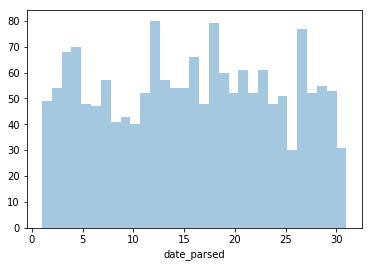

In [94]:
sns.distplot(day_of_month_landslide,kde=False,bins=31)

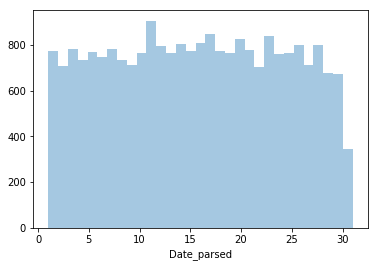

In [95]:
sns.distplot(day_of_month_earthquake,kde=False,bins=31)

In [96]:
display(volcano['Last Known Eruption'].sample(5))

764     Unknown
1069    1996 CE
34      1855 CE
489     2016 CE
9       1302 CE
Name: Last Known Eruption, dtype: object

In [97]:
volcano['Last Known Eruption']=volcano['Last Known Eruption'].replace("Unknown",np.nan)

In [99]:
volcano=volcano.dropna(subset=['Last Known Eruption'],axis=0)
display(volcano['Last Known Eruption'].head(10))

0     8300 BCE
1     4040 BCE
3     3600 BCE
4      1282 CE
5      104 BCE
7      1538 CE
8      1944 CE
9      1302 CE
10    8040 BCE
11     2016 CE
Name: Last Known Eruption, dtype: object